# Anti-Depressant drug expansion. Analysis Report

In this project we used the happiness report and economic freedom index from 2019 to analyse what would be suitable countries to expand into.

## Importing Pandas & the datasets
To do this we first importet both datasets using read_csv.

In [436]:
import pandas as pd

df = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week3/Project2/World-happiness-report/2019.csv')

df2 = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week3/Project2/Economic-Freedom/economic_freedom_index2019_data.csv', encoding='latin1')


## merging both datasets

We merged both datasets using merge. We renamed both common columns to country_or_region)

In [439]:
df.columns = ['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'Healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']

df2.columns = ['CountryID', 'country_or_region', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', "Gov't Spending", 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', "Gov't Expenditure % of GDP", 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)']

merged_df = pd.merge(df, df2, on='country_or_region')

## checking for null and duplicates

We checked for null and duplicates. There were no duplicates but several null values in the freedom index dataset

In [442]:
merged_df.duplicated().sum()
merged_df.isna().sum()


overall_rank                    0
country_or_region               0
score                           0
gdp_per_capita                  0
social_support                  0
Healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
CountryID                       0
WEBNAME                         0
Region                          0
World Rank                      5
Region Rank                     5
2019 Score                      5
Property Rights                 0
Judical Effectiveness           0
Government Integrity            0
Tax Burden                      5
Gov't Spending                  2
Fiscal Health                   2
Business Freedom                0
Labor Freedom                   1
Monetary Freedom                1
Trade Freedom                   3
Investment Freedom              2
Financial Freedom               5
Tariff Rate (%)                 3
Income Tax Rate (%)             2
Corporate Tax 

## Dropping columns we do not need.

In [445]:
merged_df = merged_df.drop(['Tax Burden','WEBNAME', 'Region', 'World Rank','Region Rank', '2019 Score', 'Property Rights','Tax Burden % of GDP', "Gov't Expenditure % of GDP", 'Country','5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)','Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)', 'Public Debt (% of GDP)'], axis=1)

In [447]:
merged_df = merged_df.drop(['Tariff Rate (%)', 'Income Tax Rate (%)', "GDP (Billions, PPP)", 'GDP Growth Rate (%)', 'Government Integrity', "Gov't Spending", 'Fiscal Health'], axis=1)

## Cleaning column names

In [450]:
merged_df.columns = ['overall_rank_happiness', 'country_name', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_id', 'judicial_effectiveness',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom', 'financial_freedom',
       'corporate_tax_rate', 'population_millions']
merged_df.columns

Index(['overall_rank_happiness', 'country_name', 'happiness_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'country_id', 'judicial_effectiveness',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom', 'financial_freedom',
       'corporate_tax_rate', 'population_millions'],
      dtype='object')

## Removing null values

In [453]:
merged_df = merged_df.dropna()

merged_df.isna().sum()


overall_rank_happiness          0
country_name                    0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
country_id                      0
judicial_effectiveness          0
business_freedom                0
labor_freedom                   0
monetary_freedom                0
trade_freedom                   0
investment_freedom              0
financial_freedom               0
corporate_tax_rate              0
population_millions             0
dtype: int64

## moving merged_df to csv for further analysis in SQL Workbench

In [456]:
merged_df.to_csv('project_data.csv', index=False)

# General Analysis of the data

In SQL we first did a general analysis of the Dataset. 
- We checked what the country is first and last in terms of happiness
- We analysed if countries with higher social support are happier on average.
- We grouped countries into happy, moderatly happy and unhappy through their position on the happiness rank and calculated the percentage weight of each group.

Visuals:
We did a bar chart of the happy, unhappy and moderate countries and calculated the % of each group. 
We also created a plot comparing social support and happiness score to confirm our hypothesis that they correlate positivly.


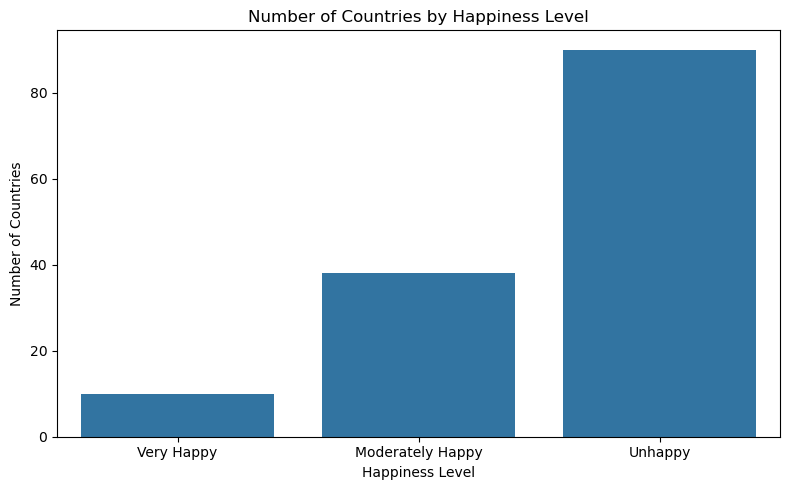

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


merged_df['happiness_level'] = pd.cut(
    merged_df['overall_rank_happiness'],
    bins=[0, 10, 50, merged_df['overall_rank_happiness'].max()],
    labels=['Very Happy', 'Moderately Happy', 'Unhappy'],
    include_lowest=True
)
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='happiness_level', order=['Very Happy', 'Moderately Happy', 'Unhappy'])
plt.title('Number of Countries by Happiness Level')
plt.xlabel('Happiness Level')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

In [461]:

happiness_counts = merged_df['happiness_level'].value_counts(normalize=False)
happiness_percentages = merged_df['happiness_level'].value_counts(normalize=True) * 100


happiness_summary = pd.DataFrame({
    'Count': happiness_counts,
    'Percentage': happiness_percentages.round(1)
})

print(happiness_summary)

                  Count  Percentage
happiness_level                    
Unhappy              90        65.2
Moderately Happy     38        27.5
Very Happy           10         7.2


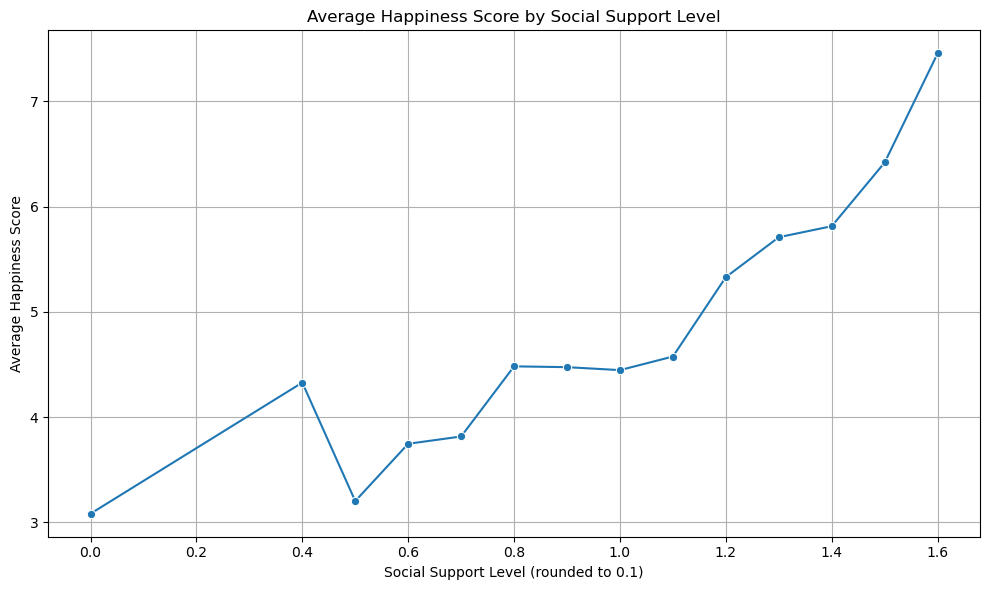

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt


support_happiness_df = (
    merged_df
    .assign(support_level=merged_df['social_support'].round(1))
    .groupby('support_level', as_index=False)
    .agg(avg_happiness=('happiness_score', 'mean'))
    .sort_values('support_level')
)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=support_happiness_df, x='support_level', y='avg_happiness', marker='o')
plt.title('Average Happiness Score by Social Support Level')
plt.xlabel('Social Support Level (rounded to 0.1)')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis of business case

We then did our big analysis and claimed that: "Countries with high GDP, low corruption, and strong social support—but middling happiness scores (<7) and with populations more than 10 million represent optimal markets for antidepressant sales due to unmet mental health needs despite favorable socioeconomic conditions. We are risk-averse investors."

So we said that we want countries that have
- 1. business_freedom > 60 
- 2. gdp_per_capita > 1.15
- 3. perception_of_corruption > 0.15
- 4. social_support > 1.15
- 5. happiness_score <7
- 6. population_millions > 10
 
The resulting countries using SQL were Germany, France, UAE and Belgium. We visualised the different variables of each of these 4 countries below.

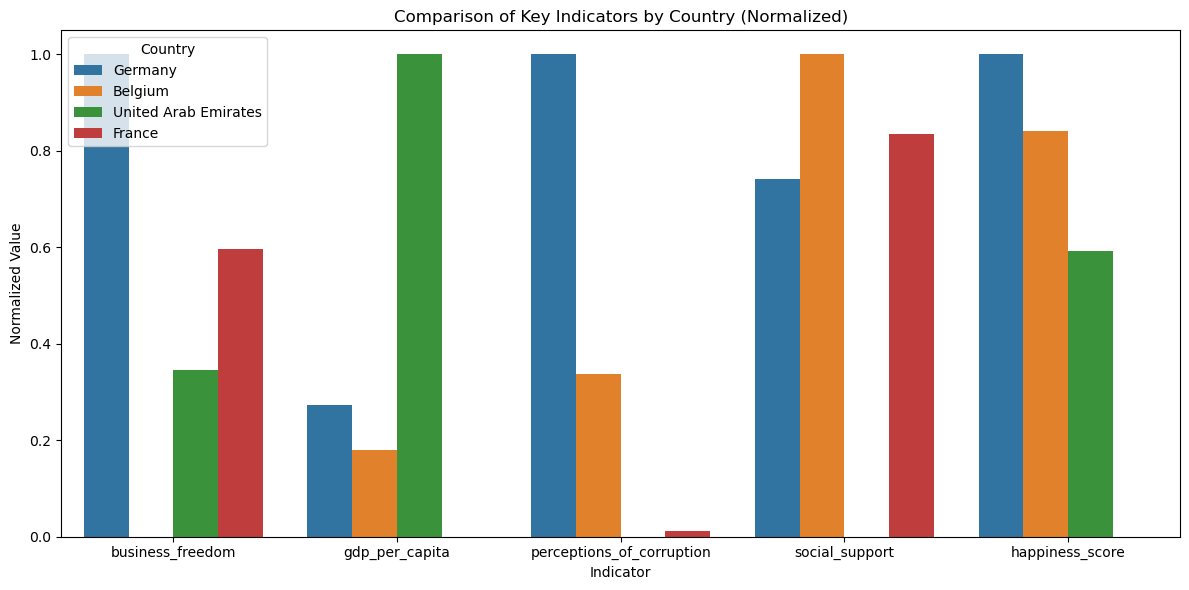

In [466]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

merged_df['population_millions'] = pd.to_numeric(merged_df['population_millions'], errors='coerce')
filtered_df = merged_df[
    (merged_df['business_freedom'] > 60) &
    (merged_df['gdp_per_capita'] > 1.15) &
    (merged_df['perceptions_of_corruption'] > 0.15) &
    (merged_df['social_support'] > 1.15) &
    (merged_df['happiness_score'] < 7) &
    (merged_df['population_millions'] > 10)
]


plot_vars = ['business_freedom', 'gdp_per_capita', 'perceptions_of_corruption',
             'social_support', 'happiness_score']
plot_df = filtered_df[['country_name'] + plot_vars]


plot_df_norm = plot_df.copy()
plot_df_norm[plot_vars] = (plot_df[plot_vars] - plot_df[plot_vars].min()) / (plot_df[plot_vars].max() - plot_df[plot_vars].min())


melted_df = plot_df_norm.melt(id_vars='country_name', var_name='Indicator', value_name='Normalized Value')


plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Indicator', y='Normalized Value', hue='country_name')
plt.title('Comparison of Key Indicators by Country (Normalized)')
plt.ylabel('Normalized Value')
plt.xlabel('Indicator')
plt.legend(title='Country')
plt.tight_layout()
plt.show()